# Coding seminar Lesson 4 - Very brief introduction to machine learning

In this lesson, we will handle interoduction to machine learning.

## Agenda
- Basic idea of machine learning (on pptx)
- Hands-on machine learning

## Installation
First you need to install Scikit-learn package (`sklearn`) to get access to machine larning modules. Please run installation command following [Scikit-learn guide website](https://scikit-learn.org/stable/install.html) (I recommend use of `conda` instead of `pip` if you use Anaconda). When you are ready, let's go!

## Hands-on
Here we will classify iris flowers, which we plotted in Lesson 2, using [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model.

### Load and show data
First let's load the data and how they look like.

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


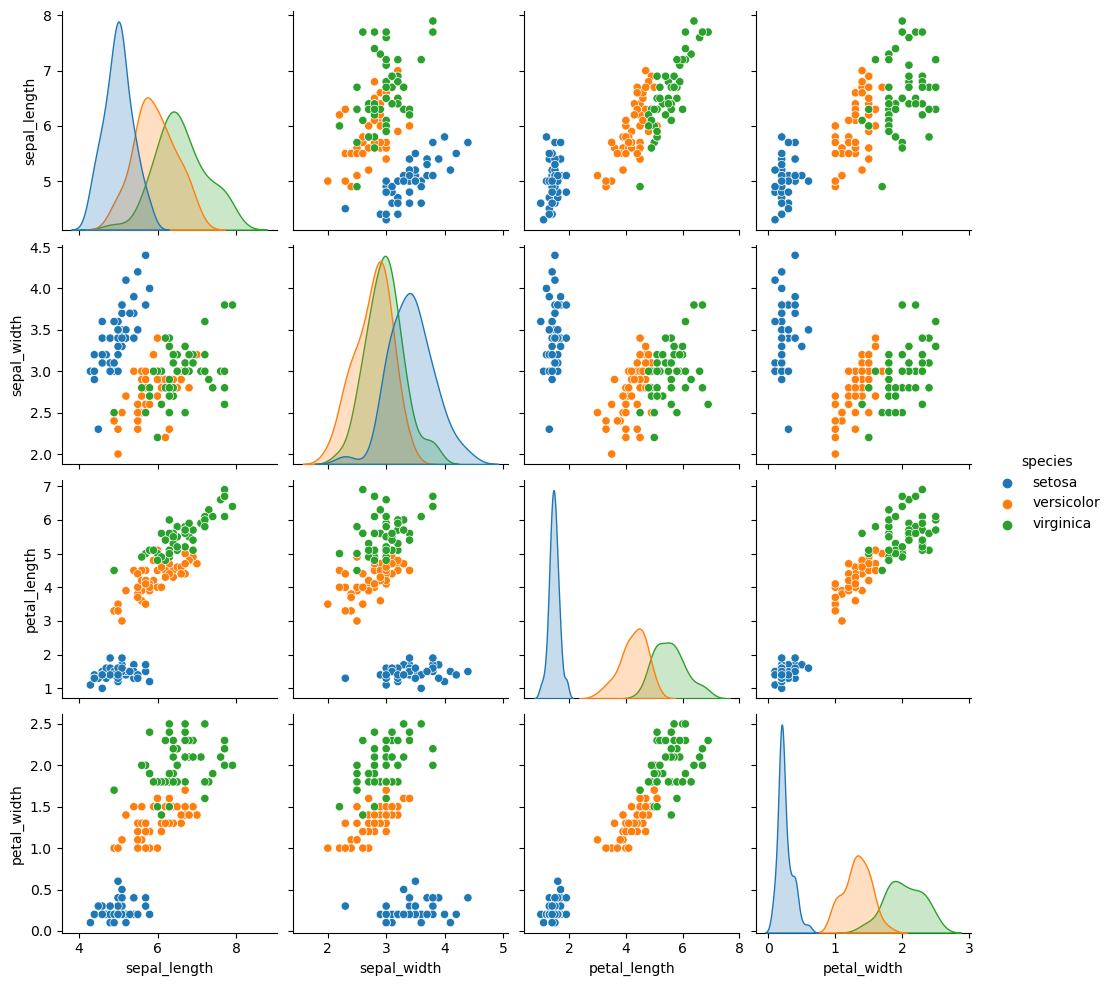

In [1]:
%matplotlib inline
import seaborn as sns

# load data
iris = sns.load_dataset('iris')

# check raw data
print(iris)

# plot features
sns.pairplot(iris, hue='species')

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


"sepal_length", "sepal_width", "petal_length", "petal_width" are **features**, and "species" is our **label** or **target**. We input features to the model and get labels out.

### Data split
We'll split this dataset to **train data** and **test data**. We fit the model to the train data, then check its accuracy with test data. Easiest way is to use `sklearn`'s [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. For ease, we'll split only the indieces of `iris` DataFrame.

In [3]:
from sklearn.model_selection import train_test_split
idx_train, idx_test = train_test_split(iris.index, test_size=0.5, random_state=42)
print('train', idx_train)
print('test', idx_test)

train Int64Index([ 84, 148,  53,   5,  93, 111,  49,  35,  80,  77,  34, 114,   7,
             43,  70,  98, 120,  83, 134, 135,  89,   8,  13, 119, 125,   3,
             17,  38,  72, 136,   6, 112, 100,   2,  63,  54, 126,  50, 115,
             46, 139,  61, 147,  79,  59,  91,  41,  58,  90,  48,  88, 107,
            124,  21,  57, 144, 129,  37, 140,   1,  52, 130, 103,  99, 116,
             87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
           dtype='int64')
test Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
             32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
             66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
             39,  95, 117,  47,  97, 113,  33, 138, 101,  62],
           dtype='int64')


### Preprocessing
To feed this data, we have to clean the data a bit: Decision Tree model does not accept `str` input, therefore we have to replace `species` column to integer.

Depending the model you use, various preprocessing will be needed, such as
- fill `nan` values
- (most of non-tree based model) scale the input values to the range 0-1, see [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- (mainly neural networks) scale the input distribution to Gaussian-like, see [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- transform categorical features to one-hot numeric way, see [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

Often the scaling method has essential part in better prediction. For other scaling methods, see `sklearn`'s [preprocessing guide](https://scikit-learn.org/stable/modules/preprocessing.html#).
For unevenly distributed data, [Mapping to a Gaussian distribution](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution) gives interesting insights.

In [4]:
# import label encoder and "fit" it to the species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.iloc[idx_train].species)

# transform the species column and make a new dataframe
iris_procd = iris.copy()
iris_procd.species = le.transform(iris_procd.species)
print(iris_procd)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


Data preprocessing is done, now let's prepare `x` (featrues) and `y` (labels) for training data and test data

In [5]:
x_train = iris_procd.iloc[idx_train, :-1]
y_train = iris_procd.iloc[idx_train, -1]
x_test = iris_procd.iloc[idx_test, :-1]
y_test = iris_procd.iloc[idx_test, -1]

### Define and fit model to train data
Now the data is ready, let's define the model and fit the model to the train data.

In [6]:
# define a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# fit the classifier to the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier()

To check how well this model fits to the training data, [`score`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) function is provided. This is mean accuracy of `y`.

In [7]:
clf.score(x_train, y_train)

1.0

This value means the model is 100% fit to the training data!

### Prediction
Now let's try this model with test data.

In [8]:
pred_test = clf.predict(x_test)
print('true labels: ', y_test.to_numpy())
print('predicted labels: ', pred_test)

print('score', clf.score(x_test, y_test))


true labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1]
predicted labels:  [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 2 2 0 0 0 1 0 1 2 0 1 2 0 1 2
 2]
score 0.9333333333333333


### Evaluate accuracy
[`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) nicely visualizes the accuracy of the prediction.

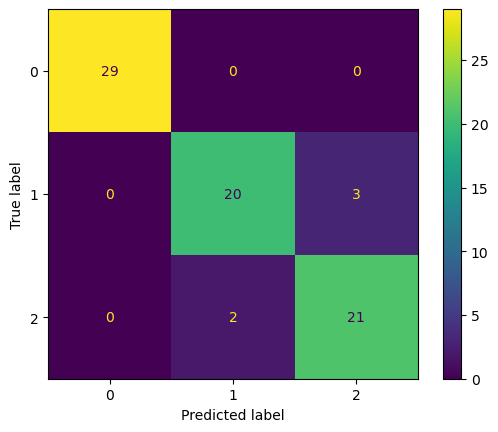

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Analyze the model
Now let's dig in to the model. Attribute [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) describes which feature is more affecting the decision. Most models provide this attribute to check which features are heavily used.
Note that in case of non-standardized features, importance values vary depending on the aboslute value of the features.

In our case, "petal_width" is most important, as you can see from the pair plot above.

<BarContainer object of 4 artists>

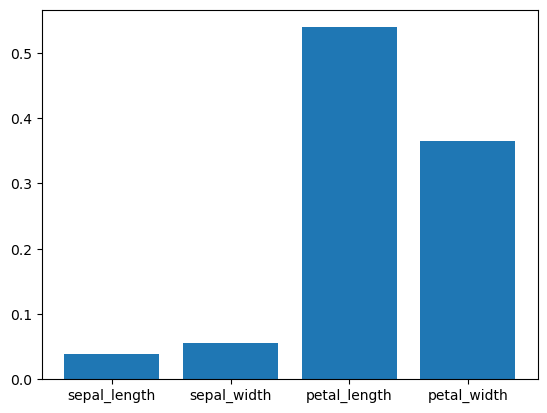

In [10]:
import matplotlib.pyplot as plt
feature_importances_ = clf.feature_importances_
plt.bar(x=iris.columns[:-1], height=feature_importances_)

We can also see the structure of the tree, i.e. the model's thinking path, with `plot_tree()` function.

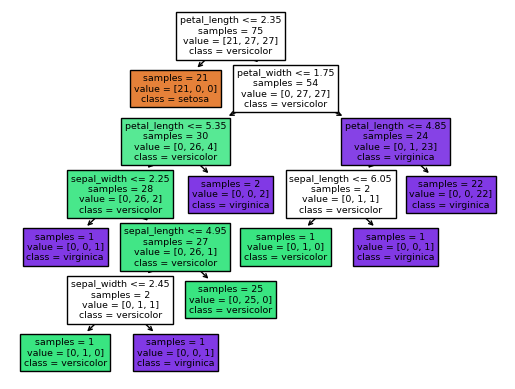

In [11]:
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=iris.columns[:-1], class_names=iris.species.unique(), impurity=False, filled=True)
plt.show()

## Hands-on 2: LightGBM
### Other models

Desicion tree is only one of the models. See [`sklearn` guide](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to choose which model (estimator) is good for your dataset.

One model that is widely used in Kaggle (and my favorite) is [`LightGBM`](https://lightgbm.readthedocs.io/en/latest/index.html). This model is highly flexible, fast, low memory usage, and has a lot of helping function, and considered as "first step LightGBM". This model is "gradient boosting framework" that uses multiple trees boosted on the previous training epochs.

### LightGBM
Let's try `LightGBM` to predict housing price with California housing dataset from `sklearn`.

In [12]:
from sklearn import datasets
x, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

print(x.shape)
print(x.head())
print(y.head())


(20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


`x` has shape of `(20640, 8)` which means it has 20640 data points with 8 features. This is too much to plot in one panel, so let's randomly pick 100 samples and plot. This might take time due to many features...

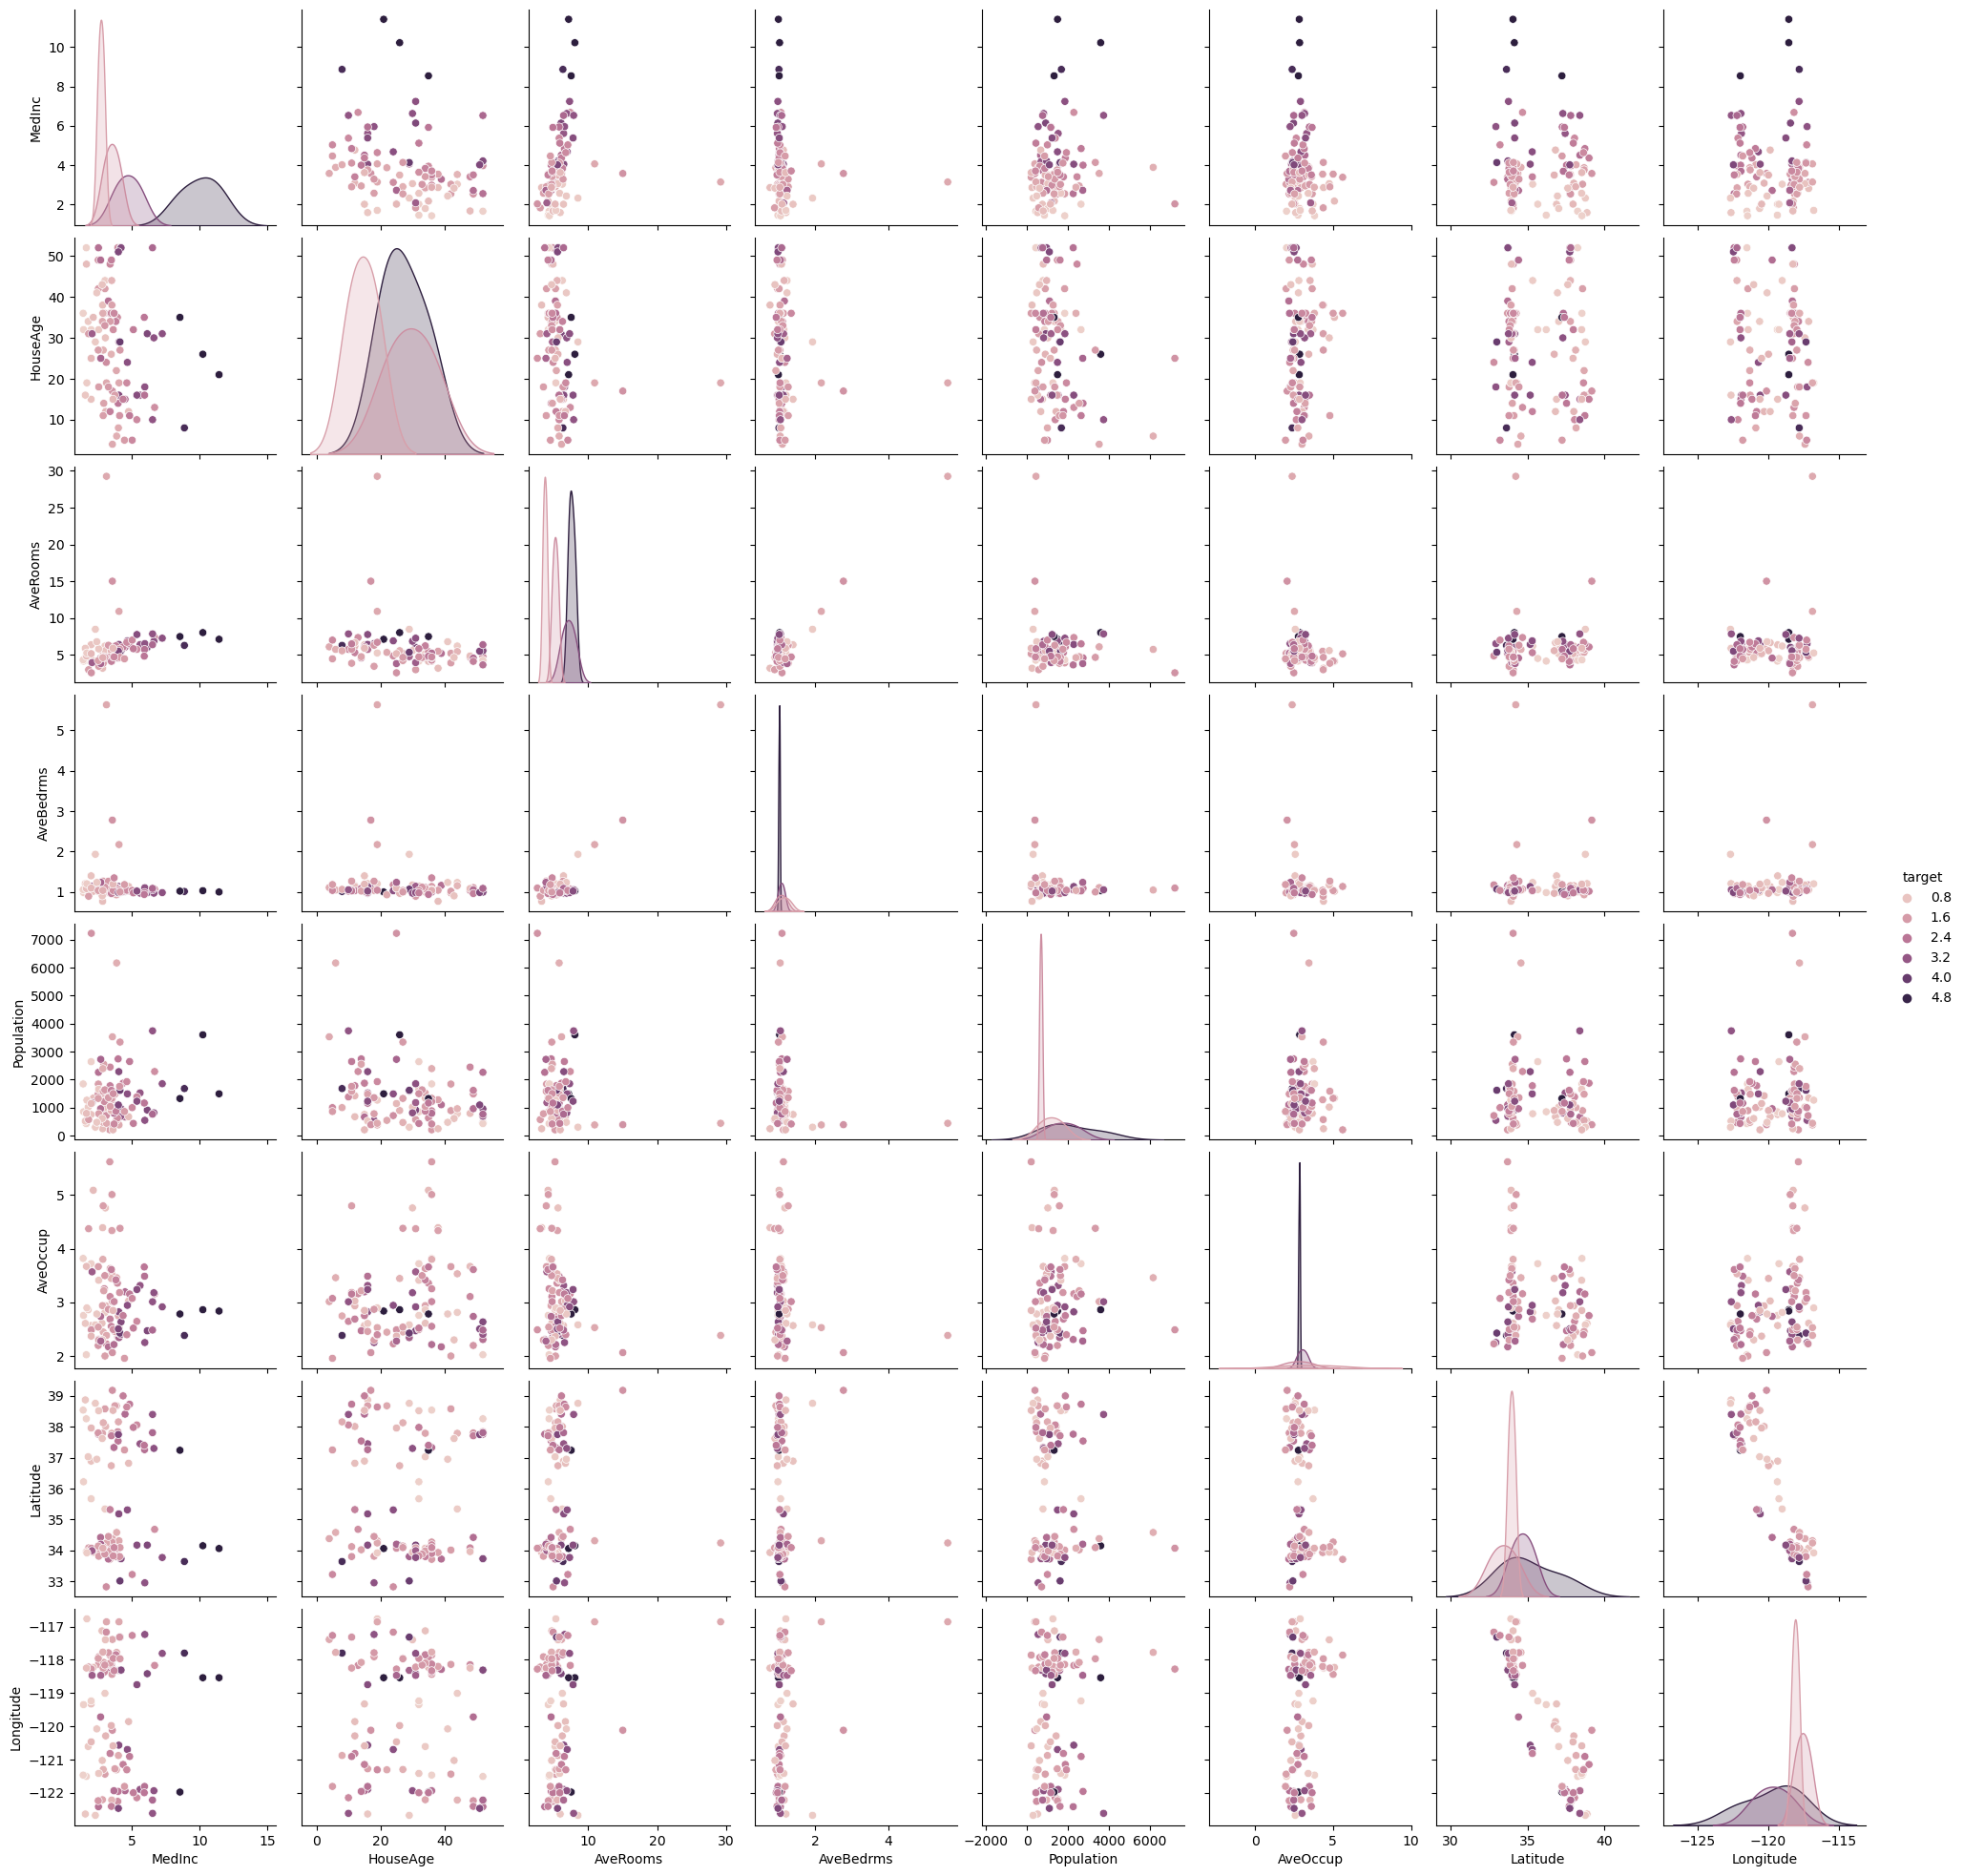

In [13]:
df_to_plot = x.sample(n=100)
df_to_plot['target'] = y.loc[df_to_plot.index]
sns.pairplot(df_to_plot, hue='target')

Now randomly split it for train and test, and try prediction.

In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
params = {
    'objective': 'regression',
    'metrics': 'mae'
}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(**params)
model.fit(x_train, y_train)
y_pred_lgbm = model.predict(x_test)

Just for the comparison, let's do the same with decision tree and compare the error (mean squared error).

In [15]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)

print('score LGBM:', model.score(x_test, y_test))
print('score DecisionTree:', model_tree.score(x_test, y_test))

print("MSE LGBM:", mean_squared_error(y_test, y_pred_lgbm))
print("MSE DecisionTree:", mean_squared_error(y_test, y_pred_tree))


score LGBM: 0.8360449251645318
score DecisionTree: 0.622075845135081
MSE LGBM: 0.21484820209255617
MSE DecisionTree: 0.495235205629094


LightGBM has obviously smaller error!

Here we used `mean_squared_error` as comparison, but it depends what kind of loss you want to suppress.
In LightGBM, you can set the loss function to minimize.
What is your ideal loss distribution? Even? Or want to ignore small number of large error samples and stick to large number of small error samples?

### Hyperparameter tuning

LightGBM has many [hyperparameters](https://lightgbm.readthedocs.io/en/latest/Parameters.html#learning-control-parameters) to tune. They are essential to improve the accuracy, and it is important to understand which parameter works in what way.

You can try to tune them (rather manually) to use [cross validation (see pptx) and grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html),
but an easy way to do so is use a package [`optuna`](https://optuna.readthedocs.io/en/stable/index.html).
Optuna has integration to many estimation models and automates parameter fitting (though there are some restrictions), plus interface to study the effect.
See [Optuna documentation for LightGBM](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.lightgbm.LightGBMTuner.html) and other tutorials.

### Overfitting and underfitting, learning curve

**Overfitting** is when the model is fit to the training data too well and cannot adapt to new (test) data, and **underfitting** is vice versa.
All the hyperparameters can cause overfitting/underfitting if the values are too high/low. Let's take an example of `num_iteration`.

`num_iteration` describes how many times you repeat the boosting. If this value is too high, the model is too much fit to the training data, while if too low there are still some room to improve.
To find the best value, fit the model for the training data and see how loss value of **training data** is suppressed while increasing `num_iteration` along with **validation data**. The validation data must be different from the test data.

Now let's tke some parts out from the training data as validation data, and try to see the learning curve.

[10]	training's l1: 0.530799	valid_1's l1: 0.55578
[20]	training's l1: 0.403496	valid_1's l1: 0.436462
[30]	training's l1: 0.342975	valid_1's l1: 0.380552
[40]	training's l1: 0.316487	valid_1's l1: 0.357706
[50]	training's l1: 0.302436	valid_1's l1: 0.3483
[60]	training's l1: 0.292122	valid_1's l1: 0.341763
[70]	training's l1: 0.284	valid_1's l1: 0.337923
[80]	training's l1: 0.277146	valid_1's l1: 0.334541


c:\Users\ikueh\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[90]	training's l1: 0.270993	valid_1's l1: 0.331673
[100]	training's l1: 0.265324	valid_1's l1: 0.329419


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

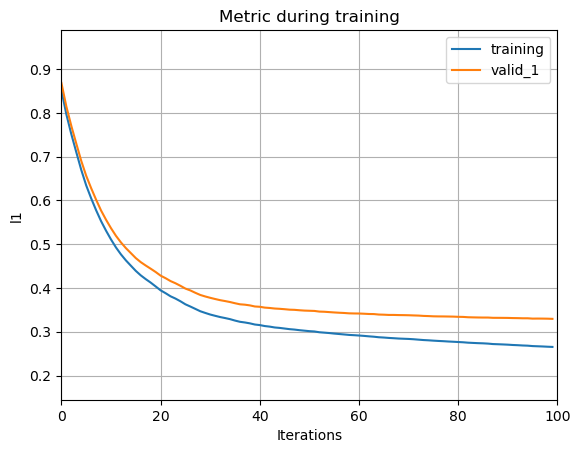

In [16]:
# initialize the model
model = lgb.LGBMRegressor(**params)

# split original x_train/y_train into train and validation set
x_train_lc, x_val_lc, y_train_lc, y_val_lc = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model.fit(x_train_lc, y_train_lc, eval_set=[(x_train_lc, y_train_lc), (x_val_lc, y_val_lc)], verbose=10)

# plot learning curve
lgb.plot_metric(model)

Looking at the garph, around 80th iterations the error value (l2) of `valid_1` does not decrease, while that of the `training` dexreases. This is the beginning of the overfitting. On the other hand, when iteration is below 80, both value continues to decrease. This region we can see underfitting.

In [17]:
# initialize the model
params_iter = {
    'objective': 'regression',
    'metric': 'mse',
    'num_iterations': 80,
}
model = lgb.LGBMRegressor(**params_iter)

# split original x_train/y_train into train and validation set
model.fit(x_train_lc, y_train_lc, eval_set=[(x_train_lc, y_train_lc), (x_val_lc, y_val_lc)], verbose=10)

print('score training: ', model.score(x_train_lc, y_train_lc))
print('score validation: ', model.score(x_val_lc, y_val_lc))
print('score test:', model.score(x_test, y_test))

[10]	training's l2: 0.482035	valid_1's l2: 0.525057
[20]	training's l2: 0.307573	valid_1's l2: 0.357788
[30]	training's l2: 0.237384	valid_1's l2: 0.293623
[40]	training's l2: 0.208805	valid_1's l2: 0.271089
[50]	training's l2: 0.192142	valid_1's l2: 0.261926
[60]	training's l2: 0.179396	valid_1's l2: 0.254746
[70]	training's l2: 0.169389	valid_1's l2: 0.250375
[80]	training's l2: 0.160744	valid_1's l2: 0.245909
score training:  0.8787615731062672
score validation:  0.8218035401297673
score test: 0.830059371716361


c:\Users\ikueh\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\ikueh\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


### Cross validation

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations ([Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%20is%20a%20resampling,model%20will%20perform%20in%20practice.)).
`sklearn` provides various methods for cross-validation. For the details, see the [official document](https://scikit-learn.org/stable/modules/cross_validation.html).

## Hands-on 3: Neural network

### Procedure

To build a neural network, use of `tensorflow` (`keras`) and `PyTorch` is preferred than `skelarn`.
The procedure is pretty much same as above:
- define your model
  - define input size
  - define vector size of layers
  - define number of layers
  - define loss function and how to reduce loss
- train
- check results

Here, let's try above by following [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner).

### Load package and data

Obtain `mnist` data from  `tensorflow`, this is various images of **labeled** handwriten numbers.

In [18]:
# load tensroflow
import tensorflow as tf

# load mnist data module
mnist = tf.keras.datasets.mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Let's check how the data look like. From the shape, we can tell that it has 60000 data points of 28 x 28 pixel images.

(60000, 28, 28)


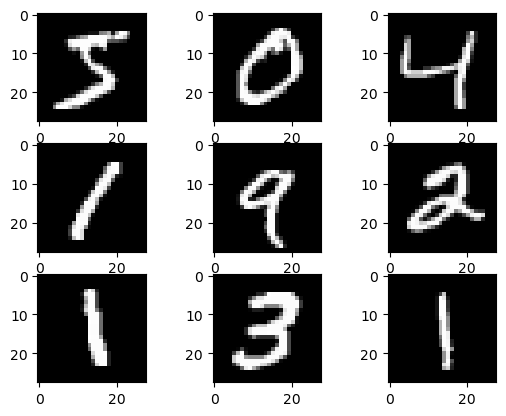

In [19]:
print(x_train.shape)
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Scale the data. Neural network always prefer input range of 0-1.

In [20]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Build a model and compile
Build a deep learning model using `tf.keras.modules.Sequential`.
- First layer is input layer, size is specified as 28 x 28. `Flatten` is a layer that flattens 28 x 28 input to a vector that has 784 elements.
- Second layer is `Dense`, this connects all 784 elements to 128 element and generate a new vector, using `relu` activation function.
- Third layer is `Dropout`, this randomly drops elements from the previous layer. Here 20% of the elements are dropped. This makes the model robust.
- Forth layer is output and `Dense` again, this connects 102 elements to 10 elements, which reperesents **probability** of each number.

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

Define a loss function.

In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Define optimizer (how to minimize the loss value) and metrics, then compile the model.

In [23]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy'])

### Fit the model to the train data
Now fit 5 times!

In [24]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1444 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0876 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9774


### Check the result with test data
Evaluate the model accuracy. The result is approx 91% accurate.

In [25]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0729 - accuracy: 0.9774 - 563ms/epoch - 2ms/step


[0.07289678603410721, 0.977400004863739]

Wrap the final output layer with [`Softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax), this function mutiplies the value of the layer to make the sum 1.

In [26]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

Now let's test first 5 samples from test, and compare the results.

In [28]:
import numpy as np
predict_5samples = probability_model(x_test[:5])

for (y, p) in zip(y_test[:5], predict_5samples):
    print("Actual:", y, " Prediction:", np.argmax(p), " Probability:", np.max(p))


Actual: 7  Prediction: 7  Probability: 0.99895227
Actual: 2  Prediction: 2  Probability: 0.99991906
Actual: 1  Prediction: 1  Probability: 0.9988745
Actual: 0  Prediction: 0  Probability: 0.9997882
Actual: 4  Prediction: 4  Probability: 0.96908915


That's it!

### Something more to learn...

Above is just a very simple example. In the [official document](https://www.tensorflow.org/learn), you can find more various functions such as
- Many other kind of layers, convolutional, pooling, mapping, LSTM...
- Transfer learning: use already built model to fit your problem
- and much more...

Keep learning!